#  **1. Librerias**

In [ ]:
# Importamos las distintas librerias que vamos a utilizar:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly
%matplotlib inline
from sklearn.metrics import r2_score

# **2. Proyecto**

## Introducción de base de datos
En este proyecto se hará el análisis de datos a un data set [Cost Prediction on acquiring Customers.](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart) encontrado en la plataforma Kaggle y creado por Food Mart (CFM), una cadena de tiendas de insumos básicos en Estados Unidos.

Es una base de datos que cuenta con información de 60.428 clientes de la cadena, de los cuales se recolectaron 40 variables.

## Objetivo del negocio.
En este proyecto se busca realizar un agrupamiento de clientes de los clientes actuales de la filial canadiense de la empresa Food Mart, para poder realizar predicciones sobre el costo de adquirir nuevos clientes y determinar cuál debe ser la población objetivo de la tienda.
### Meta.
La meta de este proyecto es obtener una segmentación del mercado a partir del costo por cliente para obtener una estrategia adecuada de captación, dada la minimización del costo de atraer nuevos clientes.
### Estrategia.
Para ello se seguira la siguiente estrategia: en primer lugar, se identificaran las variables más importantes en cuanto al costo de adquirir nuevos clientes. Luego, con base en estas variables se identificarán distintas caracteristicas que deben tener los clientes objetivo de la cadena Food Mart; es decir, aquellos clientes que implican un menor costo de adquisición, se usaran modelos de regresión y arboles de decisión vistos en el modulo de Machine Learning con el fin de crear una herramientamás eficiente.

In [ ]:
# Como puede evidenciarse, la base de datos consiste en la siguiente información, de donde se evaluan las preferencias de las compras de cada consumidor
# así como características propias del mismo. Ahora bien, puesto que es más facil fidelizar clientes que atraer nuevos clientes, se hace necesario caracterizar
# a los clientes ya existentes, para atraer a otros que se encuentren en el mismo nicho de mercado y no perder recursos.
cost_client = pd.read_csv('proyecto.csv')
cost_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
cost_client.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


# **3. Limpieza de la base de datos**

Siendo una base de datos considerablemente grande, es necesario realizar ciertas modificaciones a la misma de forma que se adapte más a los objetivos planteados.

In [ ]:
# Lo primero es verificar si existen datos faltantes, y en caso de ser así, cuántos:
cost_client.isnull().sum()
# Afortunadamente, cada una de las variables se encuentra completa.

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [ ]:
# La siguiente modificación importante radica en delimitar las observaciones solamente para aquellos clientes que realizan sus compras en Canada:

cost_client_canada = cost_client[cost_client['sales_country']=='Canada']

In [ ]:
# Igualmente, lo anterior implica que la variable 'sales_country' es completamente irrelevante, por lo que la eliminamos:

cost_client_canada=cost_client_canada.drop('sales_country', axis=1)

In [ ]:
cost_client_canada.info()

# Vemos que ahora contamos con una base de datos con un total de 3964 observaciones y 39 variables.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3964 entries, 156 to 60427
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               3964 non-null   object 
 1   food_department             3964 non-null   object 
 2   food_family                 3964 non-null   object 
 3   store_sales(in millions)    3964 non-null   float64
 4   store_cost(in millions)     3964 non-null   float64
 5   unit_sales(in millions)     3964 non-null   float64
 6   promotion_name              3964 non-null   object 
 7   marital_status              3964 non-null   object 
 8   gender                      3964 non-null   object 
 9   total_children              3964 non-null   float64
 10  education                   3964 non-null   object 
 11  member_card                 3964 non-null   object 
 12  occupation                  3964 non-null   object 
 13  houseowner                  39

In [ ]:
from pandas.core.arrays import boolean

# Con la nueva base de datos, lo siguiente es tratar con las variables tipo objeto. Como lo que se busca es determinar el impacto de cada variable sobre el costo de mantener a un cliente, requerimos que todas las variables sean numéricas.
# Por ello, determinaremos cuales de las variables tipo objeto son discretas y cuales no. De esta forma, y para facilitar el proceso, se eliminarán aquellas variables que no sean discretas. Se consideraran como discretas aquellas variables
# que cuenten con 4 o menos valores posibles.

def var_discretas(base, discreta:boolean):
  resultado = []
  if discreta == True:
    for columna in base:
      if base[columna].dtypes == 'object':
        if len(base[columna].value_counts()) <= 4:
          resultado.append(columna)
    return resultado
  else:
    for columna in base:
      if base[columna].dtypes == 'object':
        if len(base[columna].value_counts()) > 4:
          resultado.append(columna)
    return resultado


In [ ]:
discretas = var_discretas(cost_client_canada, True)
print(discretas)
# Estas son las variables tipo objeto que califican como discretas

['food_family', 'marital_status', 'gender', 'member_card', 'houseowner', 'store_type', 'store_city', 'store_state']


In [ ]:
no_discretas = var_discretas(cost_client_canada, False)
print(no_discretas)
# Estas son las variables tipo objeto que no califican como discretas

['food_category', 'food_department', 'promotion_name', 'education', 'occupation', 'avg. yearly_income', 'brand_name', 'media_type']


In [ ]:
# Ahora, procedemos a eliminar cada una de las variables no discretas.

cost_client_clean = cost_client_canada.drop(no_discretas, axis=1)

In [ ]:
cost_client_clean.info()

# La nueva base de datos cuenta con 31 variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3964 entries, 156 to 60427
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_family                 3964 non-null   object 
 1   store_sales(in millions)    3964 non-null   float64
 2   store_cost(in millions)     3964 non-null   float64
 3   unit_sales(in millions)     3964 non-null   float64
 4   marital_status              3964 non-null   object 
 5   gender                      3964 non-null   object 
 6   total_children              3964 non-null   float64
 7   member_card                 3964 non-null   object 
 8   houseowner                  3964 non-null   object 
 9   avg_cars_at home(approx)    3964 non-null   float64
 10  num_children_at_home        3964 non-null   float64
 11  avg_cars_at home(approx).1  3964 non-null   float64
 12  SRP                         3964 non-null   float64
 13  gross_weight                39

In [ ]:
# Lo siguiente entonces es, en cada una de las variables discretas, pasar los datos tipo objeto a tipo int. Todo esto lo haremos en una base de datos distinta:
cost_client_final = cost_client_clean.copy()

In [ ]:
for variable in discretas:
  contador = 0
  for i, v in cost_client_final[variable].value_counts().items():
    cost_client_final[variable] = cost_client_final[variable].replace({i:contador})
    contador = contador + 1
  print(cost_client_final[variable].value_counts())


0    2810
1     809
2     345
Name: food_family, dtype: int64
0    2083
1    1881
Name: marital_status, dtype: int64
0    2043
1    1921
Name: gender, dtype: int64
0    2194
1     873
2     485
3     412
Name: member_card, dtype: int64
0    2334
1    1630
Name: houseowner, dtype: int64
0    3384
1     580
Name: store_type, dtype: int64
0    3384
1     580
Name: store_city, dtype: int64
0    3964
Name: store_state, dtype: int64


In [ ]:
for variable in discretas:
  contador = 0
  print(f'Para la variable {variable} tenemos:')
  for i, v in cost_client_clean[variable].value_counts().items():
    print(f'{i} ahora es {contador}')
    contador = contador + 1

Para la variable food_family tenemos:
Food ahora es 0
Non-Consumable ahora es 1
Drink ahora es 2
Para la variable marital_status tenemos:
M ahora es 0
S ahora es 1
Para la variable gender tenemos:
M ahora es 0
F ahora es 1
Para la variable member_card tenemos:
Bronze ahora es 0
Normal ahora es 1
Silver ahora es 2
Golden ahora es 3
Para la variable houseowner tenemos:
Y ahora es 0
N ahora es 1
Para la variable store_type tenemos:
Deluxe Supermarket ahora es 0
Mid-Size Grocery ahora es 1
Para la variable store_city tenemos:
Vancouver ahora es 0
Victoria ahora es 1
Para la variable store_state tenemos:
BC ahora es 0


In [ ]:
# Luego, eliminaremos aquellas variables que, por alguna u otra razon, solo tomen un valor, ya que eso las hace irrelevantes:
for variable in cost_client_final:
  if len(cost_client_final[variable].value_counts()) <= 1:
    cost_client_final = cost_client_final.drop(variable , axis = 1)

In [ ]:
# Por último, usamos estadistica descriptiva pra identificar si hay más variables que sea apropiado eliminar:
cost_client_final.describe()

,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,member_card,houseowner,avg_cars_at home(approx),...,store_type,store_city,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,video_store,salad_bar,prepared_food,cost
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,...,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,0.378153,6.628930,2.654751,3.136731,0.474521,0.484612,2.564329,0.776741,0.411201,2.235116,...,0.146317,0.146317,24771.233098,18034.069627,4041.898083,2695.119072,0.853683,0.853683,0.853683,101.020363
std,0.639784,3.467184,1.451925,0.811520,0.499413,0.499826,1.471797,1.020780,0.492114,1.120190,...,0.353468,0.353468,4008.329080,3904.055969,62.563867,41.355776,0.353468,0.353468,0.353468,32.606501
min,0.000000,1.000000,0.322400,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23112.000000,16418.000000,4016.000000,2678.000000,0.000000,0.000000,0.000000,51.000000
25%,0.000000,3.930000,1.532100,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,23112.000000,16418.000000,4016.000000,2678.000000,1.000000,1.000000,1.000000,75.220000
50%,0.000000,6.160000,2.438700,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,23112.000000,16418.000000,4016.000000,2678.000000,1.000000,1.000000,1.000000,102.470000
75%,1.000000,8.760000,3.510225,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,23112.000000,16418.000000,4016.000000,2678.000000,1.000000,1.000000,1.000000,138.180000
max,2.000000,22.920000,9.094500,6.000000,1.000000,1.000000,5.000000,3.000000,1.000000,4.000000,...,1.000000,1.000000,34452.000000,27463.000000,4193.000000,2795.000000,1.000000,1.000000,1.000000,147.170000


In [ ]:
# La tabla anterior da luz de algunos detalle interesantes. Por ejemplo, es posible ver que hay algunas variables que cuentan con la misma media y la misma desviación estandar.
# Por ello, vamos a verificar algunas medidas de forma de sus distribuciones.
# para las variables video_store, salad_bar, prepared_food:

print('la curtosis de cada una de las variables es:')
print('video_store:', cost_client_final['video_store'].kurt())
print('salad_bar:', cost_client_final['salad_bar'].kurt())
print('prepared_food:', cost_client_final['prepared_food'].kurt())

print('y su asimetria:')
print('video_store:', cost_client_final['video_store'].skew())
print('salad_bar:', cost_client_final['salad_bar'].skew())
print('prepared_food:', cost_client_final['prepared_food'].skew())

# En efecto, encontramos que estas tres variables cuentan con la misma distribución. Esto por supuesto significa también que cuentan con una correlación perfecta. Vamos a verificar a continuación
# para qué otras variables sucede esto.

la curtosis de cada una de las variables es:
video_store: 2.009925126726354
salad_bar: 2.009925126726354
prepared_food: 2.009925126726354
y su asimetria:
video_store: -2.002226583545261
salad_bar: -2.002226583545261
prepared_food: -2.002226583545261


In [ ]:
# Encontramos las correlaciones entre las variables
matriz_corre = cost_client_final.corr()
matriz_corre
# Es posible ver a simple vista que existe correlación perfecta entre distintas variables. Sin embargo, al realizar una revisión minuciosa, nos damos cuenta que las variables
# que presentan esta correlación entre ellas son todas de tipo binaria. Tenemos entonces por ejemplo las variables store_type y store_city, con correlación de 1
# En este caso tenemos entonces que todos aquellos clientes que compran en tiendas tipo Deluxe Supermarket (valor 0) compran en Vancouver (valor 0), mientras que todos los que
# compran en tiendas tipo Mid-Size Grocery (valor 1) compran en Victoria (valor 1). Pese a que esta situación puede de cierta forma avalar la correlación perfecta, a fin de
# facilitar el análisis a realizar en este proyecto, se eliminaran las variables con correlación perfecta entre ellas.

,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,member_card,houseowner,avg_cars_at home(approx),...,store_type,store_city,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,video_store,salad_bar,prepared_food,cost
food_family,1.000000,-0.033236,-0.031704,-0.017476,-0.006560,-0.023225,0.027888,0.014167,0.005298,-0.016703,...,-0.002599,-0.002599,-0.002599,-0.002599,-0.002599,-0.002599,0.002599,0.002599,0.002599,-0.008832
store_sales(in millions),-0.033236,1.000000,0.952802,0.502654,-0.030050,-0.001115,0.102937,0.021874,0.013979,-0.000782,...,0.001091,0.001091,0.001091,0.001091,0.001091,0.001091,-0.001091,-0.001091,-0.001091,0.016127
store_cost(in millions),-0.031704,0.952802,1.000000,0.477047,-0.037571,-0.007713,0.102065,0.021864,0.019148,-0.015506,...,0.002301,0.002301,0.002301,0.002301,0.002301,0.002301,-0.002301,-0.002301,-0.002301,0.021262
unit_sales(in millions),-0.017476,0.502654,0.477047,1.000000,-0.033117,-0.015963,0.210871,0.067321,0.002609,0.012093,...,0.002372,0.002372,0.002372,0.002372,0.002372,0.002372,-0.002372,-0.002372,-0.002372,0.004459
marital_status,-0.006560,-0.030050,-0.037571,-0.033117,1.000000,0.120745,-0.001889,-0.136143,0.305480,-0.034845,...,0.043995,0.043995,0.043995,0.043995,0.043995,0.043995,-0.043995,-0.043995,-0.043995,0.046955
gender,-0.023225,-0.001115,-0.007713,-0.015963,0.120745,1.000000,0.049368,-0.034184,-0.030691,-0.026436,...,-0.010104,-0.010104,-0.010104,-0.010104,-0.010104,-0.010104,0.010104,0.010104,0.010104,-0.015914
total_children,0.027888,0.102937,0.102065,0.210871,-0.001889,0.049368,1.000000,0.135277,-0.036182,0.017302,...,0.026526,0.026526,0.026526,0.026526,0.026526,0.026526,-0.026526,-0.026526,-0.026526,-0.047318
member_card,0.014167,0.021874,0.021864,0.067321,-0.136143,-0.034184,0.135277,1.000000,-0.086442,0.038194,...,-0.022036,-0.022036,-0.022036,-0.022036,-0.022036,-0.022036,0.022036,0.022036,0.022036,-0.035569
houseowner,0.005298,0.013979,0.019148,0.002609,0.305480,-0.030691,-0.036182,-0.086442,1.000000,-0.031236,...,0.000730,0.000730,0.000730,0.000730,0.000730,0.000730,-0.000730,-0.000730,-0.000730,-0.013795
avg_cars_at home(approx),-0.016703,-0.000782,-0.015506,0.012093,-0.034845,-0.026436,0.017302,0.038194,-0.031236,1.000000,...,-0.039108,-0.039108,-0.039108,-0.039108,-0.039108,-0.039108,0.039108,0.039108,0.039108,-0.033478


In [ ]:
correlacion_1 = []
for columna in matriz_corre:
  for i, v in matriz_corre[columna].value_counts().items():
    if i == 1.0:
      if v > 1:
        correlacion_1.append(columna)

# Todas estas son las variables que tienen correlación igual a 1 con alguna otra variable. Para facilitar el analisis, vamos a eliminarlas
# a todas menos a avg_cars_at home(approx) (puesto que eliminaremos a la variable con la que se correlaciona perfectamente:avg_cars_at home(approx).1)

correlacion_1.remove('avg_cars_at home(approx)')

correlacion_1


['avg_cars_at home(approx).1',
 'store_type',
 'store_city',
 'video_store',
 'salad_bar',
 'prepared_food']

In [ ]:
cost_client_final = cost_client_final.drop(correlacion_1 ,axis=1)

In [ ]:
matriz_corre2 = cost_client_final.corr()

In [ ]:
# Igualmente, hay algunas variables con correlación mayor a 1, por lo que tambien las eliminamos

correlacion_2 = []
for columna in matriz_corre:
  for i, v in matriz_corre[columna].value_counts().items():
    if i > 1.0:
      correlacion_2.append(columna)

correlacion_2 = list(dict.fromkeys(correlacion_2))
correlacion_2

['store_sqft', 'grocery_sqft', 'frozen_sqft']

In [ ]:
cost_client_final = cost_client_final.drop(correlacion_2 ,axis=1)

In [ ]:
cost_client_final = cost_client_final.rename(columns={'avg_cars_at home(approx)':'avg_cars_at_home'})

In [ ]:
# Tenemos de esta forma la base de datos definitiva con la que vamos a trabajar, la cual cuenta con un total de 3964 y 19 variables

cost_client_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3964 entries, 156 to 60427
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_family               3964 non-null   int64  
 1   store_sales(in millions)  3964 non-null   float64
 2   store_cost(in millions)   3964 non-null   float64
 3   unit_sales(in millions)   3964 non-null   float64
 4   marital_status            3964 non-null   int64  
 5   gender                    3964 non-null   int64  
 6   total_children            3964 non-null   float64
 7   member_card               3964 non-null   int64  
 8   houseowner                3964 non-null   int64  
 9   avg_cars_at_home          3964 non-null   float64
 10  num_children_at_home      3964 non-null   float64
 11  SRP                       3964 non-null   float64
 12  gross_weight              3964 non-null   float64
 13  net_weight                3964 non-null   float64
 14  recyc

In [ ]:
cost_client_final.head()


,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,member_card,houseowner,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,meat_sqft,cost
156,0,3.68,1.3616,2.0,1,1,4.0,3,1,3.0,0.0,1.84,19.7,17.7,1.0,0.0,17.0,2678.0,75.22
157,0,5.52,2.7048,3.0,0,0,4.0,0,1,3.0,0.0,1.84,19.7,17.7,1.0,0.0,17.0,2678.0,51.00
158,0,6.56,2.6896,4.0,0,0,1.0,0,0,2.0,1.0,1.64,14.1,13.1,0.0,1.0,25.0,2678.0,95.45
159,0,9.72,3.0132,3.0,0,1,4.0,1,0,1.0,2.0,3.24,16.3,14.2,1.0,0.0,25.0,2678.0,102.47
160,0,5.61,2.3001,3.0,1,0,3.0,0,1,4.0,0.0,1.87,16.7,14.7,1.0,1.0,10.0,2678.0,144.54


# **4. Estadistica**


## 4.1 descriptiva y visualización de los datos

In [ ]:
cost_client_final.describe()

,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,member_card,houseowner,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,meat_sqft,cost
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,0.378153,6.628930,2.654751,3.136731,0.474521,0.484612,2.564329,0.776741,0.411201,2.235116,0.855701,2.109955,13.924453,11.904987,0.564077,0.331231,18.937185,2695.119072,101.020363
std,0.639784,3.467184,1.451925,0.811520,0.499413,0.499826,1.471797,1.020780,0.492114,1.120190,1.291430,0.928915,4.595511,4.653207,0.495940,0.470715,10.270740,41.355776,32.606501
min,0.000000,1.000000,0.322400,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,2678.000000,51.000000
25%,0.000000,3.930000,1.532100,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.420000,9.797500,7.850000,0.000000,0.000000,10.000000,2678.000000,75.220000
50%,0.000000,6.160000,2.438700,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.125000,13.700000,11.600000,1.000000,0.000000,20.000000,2678.000000,102.470000
75%,1.000000,8.760000,3.510225,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,2.770000,17.900000,16.100000,1.000000,1.000000,28.000000,2678.000000,138.180000
max,2.000000,22.920000,9.094500,6.000000,1.000000,1.000000,5.000000,3.000000,1.000000,4.000000,5.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,2795.000000,147.170000


In [ ]:
# Podemos ver en la matriz de correlaciones de la nueva base de datos que no se presenta correlacion perfecta entre ninguna de las variables.
matriz_corre3 = cost_client_final.corr()
matriz_corre3

,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,member_card,houseowner,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,meat_sqft,cost
food_family,1.000000,-0.033236,-0.031704,-0.017476,-0.006560,-0.023225,0.027888,0.014167,0.005298,-0.016703,0.030022,-0.025811,-0.015007,-0.017389,-0.023501,-0.384183,-0.011322,-0.002599,-0.008832
store_sales(in millions),-0.033236,1.000000,0.952802,0.502654,-0.030050,-0.001115,0.102937,0.021874,0.013979,-0.000782,0.069532,0.843789,0.047321,0.045925,0.020135,-0.005092,0.004481,0.001091,0.016127
store_cost(in millions),-0.031704,0.952802,1.000000,0.477047,-0.037571,-0.007713,0.102065,0.021864,0.019148,-0.015506,0.070666,0.805204,0.045044,0.042696,0.012168,-0.005294,0.006600,0.002301,0.021262
unit_sales(in millions),-0.017476,0.502654,0.477047,1.000000,-0.033117,-0.015963,0.210871,0.067321,0.002609,0.012093,0.089618,0.014027,0.009652,0.010995,-0.002338,0.019469,0.018862,0.002372,0.004459
marital_status,-0.006560,-0.030050,-0.037571,-0.033117,1.000000,0.120745,-0.001889,-0.136143,0.305480,-0.034845,-0.629732,-0.014041,-0.000613,-0.002751,-0.012254,0.011758,-0.013127,0.043995,0.046955
gender,-0.023225,-0.001115,-0.007713,-0.015963,0.120745,1.000000,0.049368,-0.034184,-0.030691,-0.026436,-0.046051,0.010216,-0.018249,-0.019927,0.015685,0.029714,-0.016090,-0.010104,-0.015914
total_children,0.027888,0.102937,0.102065,0.210871,-0.001889,0.049368,1.000000,0.135277,-0.036182,0.017302,0.374082,0.000194,-0.005722,-0.005802,-0.016192,-0.018562,0.020975,0.026526,-0.047318
member_card,0.014167,0.021874,0.021864,0.067321,-0.136143,-0.034184,0.135277,1.000000,-0.086442,0.038194,0.379055,-0.017694,0.027342,0.026783,0.019543,-0.005703,-0.007162,-0.022036,-0.035569
houseowner,0.005298,0.013979,0.019148,0.002609,0.305480,-0.030691,-0.036182,-0.086442,1.000000,-0.031236,-0.251247,0.016043,0.022362,0.022270,-0.004596,0.000102,-0.005422,0.000730,-0.013795
avg_cars_at_home,-0.016703,-0.000782,-0.015506,0.012093,-0.034845,-0.026436,0.017302,0.038194,-0.031236,1.000000,0.070553,-0.012905,0.033125,0.037560,0.016025,-0.010388,-0.000756,-0.039108,-0.033478


In [ ]:
from matplotlib import rcParams

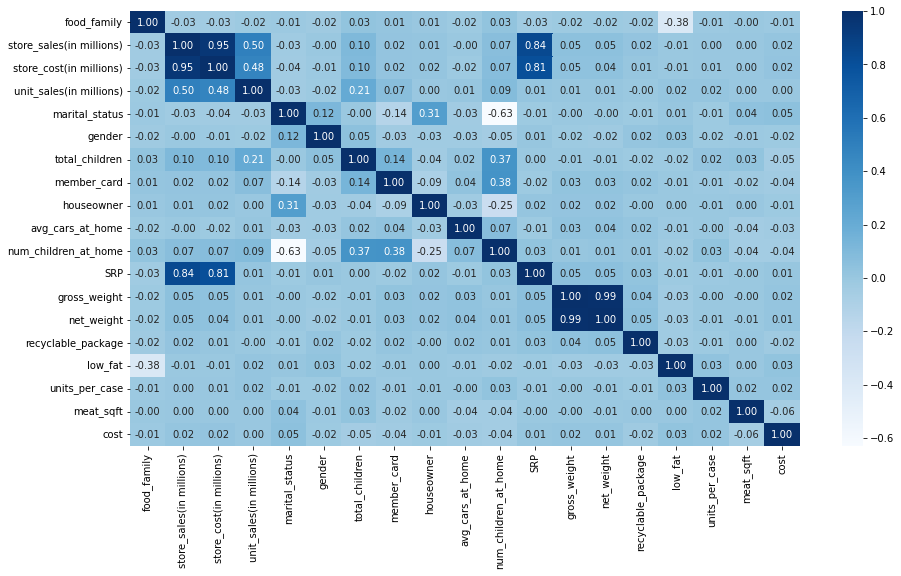

In [ ]:
# Graficamente

rcParams['figure.figsize'] = 15,8
sns.heatmap(matriz_corre3, annot=True, fmt=".2f", cmap='Blues', annot_kws = {'size':10});

In [ ]:
# Igualmente, veamos cómo se correlaciona cada una de las variables con la variable de interes: 'cost'

matriz_corre3['cost'].sort_values(ascending=False)[1:]

marital_status              0.046955
low_fat                     0.032091
store_cost(in millions)     0.021262
gross_weight                0.016345
store_sales(in millions)    0.016127
units_per_case              0.015948
net_weight                  0.014361
SRP                         0.009302
unit_sales(in millions)     0.004459
food_family                -0.008832
houseowner                 -0.013795
gender                     -0.015914
recyclable_package         -0.024702
avg_cars_at_home           -0.033478
member_card                -0.035569
num_children_at_home       -0.038980
total_children             -0.047318
meat_sqft                  -0.056080
Name: cost, dtype: float64

Las correlaciones anteriores pueden parecer pequeñas. Por ello vamos a crear una función que determine si son significativas o no

In [ ]:
def corr_pearson_costo_significativa(y, alfa=0.05):
  coef, p = stats.pearsonr(cost_client_final['cost'], y)
  print(f'Coeficiente de correlación de Pearson: {coef:.2f}')
  if p > alfa:
    print(f'Las muestras no están correlacionadas (no rechazar H0) (p = {p:.2f})')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) (p = {p:.2f})')

In [ ]:
corr_pearson_costo_significativa(cost_client_final['marital_status'])

Coeficiente de correlación de Pearson: 0.05
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


In [ ]:
corr_pearson_costo_significativa(cost_client_final['meat_sqft'])

Coeficiente de correlación de Pearson: -0.06
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


In [ ]:
corr_pearson_costo_significativa(cost_client_final['store_cost(in millions)'])

Coeficiente de correlación de Pearson: 0.02
Las muestras no están correlacionadas (no rechazar H0) (p = 0.18)


In [ ]:
corr_pearson_costo_significativa(cost_client_final['units_per_case'])

Coeficiente de correlación de Pearson: 0.02
Las muestras no están correlacionadas (no rechazar H0) (p = 0.32)


Con lo anterior hemos podido comprobar que algunas variables presentan correlación significativa respecto del costo, mientras que otras no.

In [ ]:
pd.options.plotting.backend = "plotly"

Así, podemos graficar la relacion entre nuestra variable de interes y algunas de las demás variables:


In [ ]:
# Distribucion del costo dividiendo la poblacion entre casados y solteros

cost_client_final[['marital_status', 'cost']].plot(kind='box', color='marital_status')

In [ ]:
# Distribucion del costo dividiendo la poblacion entre auellos con un porcentaje alto y bajo de grasa corporal

cost_client_final[['low_fat', 'cost']].plot(kind='box', color='low_fat')

In [ ]:
cost_client_final.plot.scatter("cost", "store_cost(in millions)")

In [ ]:
cost_client_final.plot.scatter("cost", "store_sales(in millions)")

In [ ]:
cost_client_final[['meat_sqft', 'cost']].plot(kind='box', color='meat_sqft')

In [ ]:
cost_client_final[['total_children', 'cost']].plot(kind='box', color='total_children')

In [ ]:
cost_client_final[['avg_cars_at_home', 'cost']].plot(kind='box', color='avg_cars_at_home')

## 4.2 Estadistica Inferencial

In [ ]:
# Vamos a crear una función qué permita calcular el valor promedio de distintas variables (en forma de intervalo de confianza) para
# distintos nichos de clientes.

def valor_promedio(variable_calcular, variable_nicho, valor_nicho, confianza):
  if len(cost_client_final[variable_nicho].value_counts()) > 8:
    return "La variable nicho tiene que ser de tipo categórica"
  else:
    subconjunto = cost_client_final[cost_client_final[variable_nicho]== valor_nicho][variable_calcular]
    inicio, final  = sm.stats.DescrStatsW(subconjunto).tconfint_mean(alpha = 1-confianza)
    return inicio, final

In [ ]:
print("El costo promedio de mantener a un cliente casado se encuentra en el intervalo", valor_promedio('cost', 'marital_status', 0, 0.95))
print("El costo promedio de mantener a un cliente soltero se encuentra en el intervalo", valor_promedio('cost', 'marital_status', 1, 0.95))

El costo promedio de mantener a un cliente casado se encuentra en el intervalo (98.18373348502602, 100.94753871852664)
El costo promedio de mantener a un cliente soltero se encuentra en el intervalo (101.13780715307406, 104.12481910955229)


In [ ]:
print("El costo promedio de mantener a un cliente sin hijos se encuentra en el intervalo", valor_promedio('cost', 'total_children', 0, 0.95))
print("El costo promedio de mantener a un cliente con un hijo se encuentra en el intervalo", valor_promedio('cost', 'total_children', 1, 0.95))
print("El costo promedio de mantener a un cliente con dos hijos se encuentra en el intervalo", valor_promedio('cost', 'total_children', 2, 0.95))
print("El costo promedio de mantener a un cliente con tres hijos se encuentra en el intervalo", valor_promedio('cost', 'total_children', 3, 0.95))
print("El costo promedio de mantener a un cliente con cuatro hijos se encuentra en el intervalo", valor_promedio('cost', 'total_children', 4, 0.95))
print("El costo promedio de mantener a un cliente con cinco hijos se encuentra en el intervalo", valor_promedio('cost', 'total_children', 5, 0.95))

El costo promedio de mantener a un cliente sin hijos se encuentra en el intervalo (97.99401086690968, 104.04056540427673)
El costo promedio de mantener a un cliente con un hijo se encuentra en el intervalo (98.54135299691735, 103.8609945640582)
El costo promedio de mantener a un cliente con dos hijos se encuentra en el intervalo (101.01273094686499, 105.19820530811506)
El costo promedio de mantener a un cliente con tres hijos se encuentra en el intervalo (102.3485066393855, 106.64281308850562)
El costo promedio de mantener a un cliente con cuatro hijos se encuentra en el intervalo (95.07082008228357, 99.63030957111818)
El costo promedio de mantener a un cliente con cinco hijos se encuentra en el intervalo (93.48981151125204, 99.80532610342681)


In [ ]:
# Ahora vamos a crear una funcion que indique si las diferencias entre los costos de los distintos nichos son significativas o no

def diferencia_costo_sig(variable_nicho, valor_nicho1, valor_nicho2, confianza):
  if len(cost_client_final[variable_nicho].value_counts()) > 8:
    return "La variable nicho tiene que ser de tipo categórica"
  else:
    nicho1 = cost_client_final[cost_client_final[variable_nicho]== valor_nicho1]['cost']
    nicho2 = cost_client_final[cost_client_final[variable_nicho]== valor_nicho2]['cost']
    z_score, p_valor = sm.stats.ztest(nicho1, nicho2, value=0, alternative='two-sided')
    if p_valor < 1-confianza:
      menor = valor_nicho1 if nicho1.mean() < nicho2.mean() else valor_nicho2
      return f'Entre los dos nichos, aquel que presenta un menor costo es aquel donde {variable_nicho} = {menor}'
    else:
      return "No hay diferencia significativa entre los dos nichos"

In [ ]:
diferencia_costo_sig('marital_status', 0, 1, 0.95)

'Entre los dos nichos, aquel que presenta un menor costo es aquel donde marital_status = 0'

In [ ]:

diferencia_costo_sig('total_children', 2, 3, 0.95)

'No hay diferencia significativa entre los dos nichos'

In [ ]:
diferencia_costo_sig('total_children', 1, 5, 0.95)

'Entre los dos nichos, aquel que presenta un menor costo es aquel donde total_children = 5'

In [ ]:
diferencia_costo_sig('avg_cars_at_home', 0, 3, 0.95)

'Entre los dos nichos, aquel que presenta un menor costo es aquel donde avg_cars_at_home = 3'

In [ ]:
diferencia_costo_sig('low_fat', 0, 1, 0.95)

'Entre los dos nichos, aquel que presenta un menor costo es aquel donde low_fat = 0'

#**5.  Modelo de regresión**

Finalmente, vamos a crear un modelo lineal (o multilineal) para identificar la relación entre las distintas variables con la variable de interés: 'cost'.




In [ ]:
# Función que retorna los parametros de la regresion
def regresion(variables_x):
  x=''
  for variable in variables_x:
    if x == '':
      x = variable
    else:
      x = x + ' + ' + variable
  model = sm.OLS.from_formula('cost ~ ' + x, data=cost_client_final).fit()
  #cost_predict = model.params[0] + pd.Series(cost_client_final[variables_x]).values*model.params
  return model.summary(), model.params

In [ ]:
# El modelo que nosotros crearemos usará como variables x las 7 variables más correlacionadas con el costo (sea correlacion positiva o negativa), todas las cuales cuentan con correlacion
# significativa
modelo, coeficientes = regresion(['marital_status', 'low_fat', 'meat_sqft' ,'total_children', 'num_children_at_home', 'member_card', 'avg_cars_at_home'])
print(modelo)
print(coeficientes)

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.147
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           3.61e-07
Time:                        00:48:08   Log-Likelihood:                -19415.
No. Observations:                3964   AIC:                         3.885e+04
Df Residuals:                    3956   BIC:                         3.890e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              227.3211 

In [ ]:
# Calculamos los costos predecidos por el modelo
costos_pred = (coeficientes[0] + (cost_client_final['marital_status'].values*coeficientes[1]) + (cost_client_final['low_fat'].values*coeficientes[2]) +
                (cost_client_final['meat_sqft'].values*coeficientes[3]) + (cost_client_final['total_children'].values*coeficientes[4]) +
                (cost_client_final['num_children_at_home'].values*coeficientes[5]) + (cost_client_final['member_card'].values*coeficientes[6]) +
               (cost_client_final['avg_cars_at_home'].values*coeficientes[7]))

costos_pred

array([ 97.84275105,  96.68517436, 104.20810472, ..., 102.10317684,
        96.97321801,  98.7165097 ])

#  **6. Machine Learning: Regresión y clasificación**


###6.1  Ingeniería de características
---
En esta sección se tratará, en primer lugar, de utilizar distintos modelos de machine learning para predecir el costo de adquirir un nuevo cliente, de forma que sea posible obtener mejores resultados a aquellos del modelo multilineal.

En segundo lugar, como complemento a la predicción del costo, recordemos que se busca realizar una segmentación del mercado en relación a los recursos que dispone la compañia para atraer a cada cliente. Es por ello que se propone una estrategia en tres tipos de clientes: clientes de costo alto, clientes de costo medio y de costo bajo.


Realizaremos ingeniería de caracterísiticas agregando la columna **"clasificacion"**, que contendrá la palabra "**bajo**" si el costo es menor o igual a *75.22* , o sea valor límite del primer quantil (25%) del costo; **"medio"** si el costo es superior a *75.22* y está entre *102.47* ; **"medio alto"** si está entre **138.18** y **"alto"** si el costo es superior **147.17**.



In [ ]:
#iterando sobre la columna de costo.
clasificacion = []
for i in cost_client_final['cost']:
  if i <= 75.22000:
    clasificacion.append('bajo')
  elif  102.47 > i >= 75.22000:
    clasificacion.append('medio')
  elif  138.18 > i >= 102.47:
    clasificacion.append('medio alto')
  else:
    clasificacion.append('alto')
cost_client_final['clasificacion'] = clasificacion

In [ ]:
cost_client_final.head()

,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,member_card,houseowner,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,meat_sqft,cost,clasificacion
156,0,3.68,1.3616,2.0,1,1,4.0,3,1,3.0,0.0,1.84,19.7,17.7,1.0,0.0,17.0,2678.0,75.22,bajo
157,0,5.52,2.7048,3.0,0,0,4.0,0,1,3.0,0.0,1.84,19.7,17.7,1.0,0.0,17.0,2678.0,51.00,bajo
158,0,6.56,2.6896,4.0,0,0,1.0,0,0,2.0,1.0,1.64,14.1,13.1,0.0,1.0,25.0,2678.0,95.45,medio
159,0,9.72,3.0132,3.0,0,1,4.0,1,0,1.0,2.0,3.24,16.3,14.2,1.0,0.0,25.0,2678.0,102.47,medio alto
160,0,5.61,2.3001,3.0,1,0,3.0,0,1,4.0,0.0,1.87,16.7,14.7,1.0,1.0,10.0,2678.0,144.54,alto


# Predicción del costo.




Como se mencionó, procedemos a realizar la regresión para tratar de predecir el costo de adquirir un nuevo cliente. De esta forma, se utilizarán tres modelos: Support Vector Regression, Decision Tree Regression y K-Nearest Neighbors.

## 6.2 Partición de los datos y ajuste.

En primer lugar, cargaremos los Datos en el formato X,y para poder realizar el entrenamiento. Siendo así, implementamos  la función get_split, que hace una partición de los datos en los conjuntos de entrenamiento y prueba usando Scikit-learn.

Definimos un valor de partición p del 0.2. No definimos ningín valor sobre random state

Para lo anterior, tenemos entonces como datos de entrada:
Entrada:

X: arreglo de NumPy de tamaño  (𝑛,𝑚) .
y: arreglo de NumPy de tamaño  (𝑛,) .
p: número real entre  0  y  1  con la proporción correspondiente a la partición de prueba. En este caso 0.2
random_state: número real con la semilla aleatoria para la generación de la partición. En este caso 150 (5% de los datos)

Salida:

X_train: arreglo de NumPy con shape aproximado  (𝑛⋅(1−𝑝),𝑚)  para la partición de entrenamiento de X.
X_test: arreglo de NumPy con shape aproximado  (𝑛⋅𝑝,𝑚)  para la partición de prueba de X.
y_train: arreglo de NumPy con shape aproximado  (𝑛⋅(1−𝑝),)  para la partición de entrenamiento de y.
y_test: arreglo de NumPy con shape aproximado  (𝑛⋅𝑝,)  para la partición de prueba de y.

In [ ]:
# Realizamos la partición de los datos con train_test_split
X = cost_client_final.drop(['clasificacion', 'cost'], axis = 1)

from sklearn.model_selection import train_test_split
yreg = cost_client_final['cost'] # Recordemos que en este caso la variable y es 'cost' y que no se tendrá en cuenta 'clasificacion'
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(X, yreg,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [ ]:
# Ajustamos escalas para facilidad de tratamiento estadístico.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xreg_train = sc.fit_transform(Xreg_train)
Xreg_test = sc.transform(Xreg_test)

# Modelos de regresión

Ya habiendo realizado la partición correspondiente, se procederá a realizar cada uno de los modelos mencionados. Igualmente, cabe acalarar que en cada uno de ellos se realizará validación cruzada con tres pliegues.

In [ ]:
# El primer modelo que probaremos es Support Vector Regression

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {'C':     [2**i for i in range(-5, 7, 1)]}

regr_svm = svm.LinearSVR(random_state = 0)

grid_svm = GridSearchCV(regr_svm,
                   param_grid=param_grid,
                   return_train_score=True, cv =3
                   )

grid_svm.fit(Xreg_train, yreg_train)

# Observamos que se presenta un problema de convergencia

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

GridSearchCV(cv=3, estimator=LinearSVR(random_state=0),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64]},
             return_train_score=True)

In [ ]:
accuracy = grid_svm.score(Xreg_test,yreg_test)
#Así, tenemos que los mejores parámetros y la mejor exactitud para el modelo de regresion svm es:
print('Exactitud:', accuracy)
# Vemos que la exactitud de este modelo es muy pequeña (ademas de negativa), lo cual puede explicarse tal vez porque
# los hiperparametros seleccionados para la optimización no eran los más aptos.

Exactitud: -0.003156101473491102


In [ ]:
# Costo predicho por el modelo SVM
grid_svm.predict(Xreg_test)

array([102.35449283, 100.47433071,  99.34110785, 100.32128696,
        98.52181832,  99.87539528, 103.56875671,  88.51434009,
        86.8715995 ,  94.04722351,  87.17035667, 110.49646865,
       111.34811403, 103.26778321,  99.90249657, 105.72820868,
        98.38214153,  88.15872069, 105.96943983,  96.35373613,
        99.64337122,  97.23921979, 110.87762504,  96.74350081,
        96.64490837, 102.22726381,  90.90214025, 102.95349435,
        98.25343753, 104.64448678, 100.1840061 , 102.47641465,
       104.02245102, 108.40799876, 106.21519064, 107.33524596,
        98.9284909 ,  97.53892073,  86.77967308,  80.52163019,
        85.67580519, 104.01720424,  99.66042825,  81.37639884,
        87.47206686, 105.86803193, 102.12222214, 107.45177667,
        99.30571926, 104.39635151, 107.21817692, 106.94794196,
        93.04156564,  97.82456984,  99.33151623,  95.38040965,
        99.13701271, 101.6971145 ,  98.63339834,  97.55262007,
       102.98392725,  99.5855513 ,  99.09904998,  92.21

In [ ]:
# Ahora realizamos el mismo procedimiento con el modelo de arboles de decision:

from sklearn import tree

param_grid_DT = {
    "max_depth": range(5, 60, 5),
    "criterion": ["squared_error", "absolute_error"]}

regr_DT = tree.DecisionTreeRegressor(random_state = 0)

grid_DT = GridSearchCV(regr_DT,
                   param_grid=param_grid_DT,
                   return_train_score=True,
                   cv = 3
                   )

grid_DT.fit(Xreg_train, yreg_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(5, 60, 5)},
             return_train_score=True)

In [ ]:
accuracyDT = grid_DT.score(Xreg_test,yreg_test)
#Así, tenemos que la exactitud para el modelo de regresion DT es:
print('Exactitud:', accuracyDT)
#Sigue siendo considerablemente baja, aunque con mejores resultados que el modelo svm.

Exactitud: 0.07559111370166904


In [ ]:
# Costo predicho por el modelo DT
grid_DT.predict(Xreg_test)

array([100.94713861, 108.86396825, 108.86396825, 100.94713861,
       100.94713861, 109.66582278, 109.66582278,  87.74929487,
        94.23554974,  94.23554974,  95.9362963 , 100.94713861,
       111.1217608 , 100.94713861, 111.1217608 , 100.94713861,
       112.42      , 108.86396825, 111.1217608 ,  91.50690476,
       100.94713861, 100.64398649, 103.78220096, 134.08      ,
        94.23554974,  92.80119048, 103.95166667,  91.50690476,
        94.23554974, 103.78220096, 100.94713861, 100.94713861,
       100.94713861, 100.94713861, 100.94713861, 103.78220096,
       109.66582278, 100.64398649, 100.64398649,  95.9362963 ,
        92.86337349, 100.94713861, 100.94713861,  67.0955    ,
        92.86337349, 100.94713861, 100.94713861, 100.94713861,
       111.1217608 , 100.94713861, 109.66582278, 100.94713861,
        96.19108108,  87.74929487,  95.9362963 ,  94.23554974,
       100.94713861, 100.94713861, 100.94713861,  94.23554974,
       103.78220096, 111.1217608 , 103.78220096,  92.86

In [ ]:
# Finalmente, realizamos la regresion para el modelo k-vecinos mas cercanos (KNN):

from sklearn.neighbors import KNeighborsRegressor

param_grid_KNN = {
    "n_neighbors": range(1, 10)}

regr_KNN = KNeighborsRegressor()

grid_KNN = GridSearchCV(regr_KNN,
                   param_grid=param_grid_KNN,
                   return_train_score=True,
                   cv = 3
                   )

grid_KNN.fit(Xreg_train, yreg_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 10)}, return_train_score=True)

In [ ]:
accuracyKNN = grid_KNN.score(Xreg_test,yreg_test)
#Así, tenemos que la exactitud para el modelo de regresion KNN es:
print('Exactitud:', accuracyKNN)
#Resultados sumamente bajos, inferiores al modelo DT.

Exactitud: 2.115939657598709e-06


In [ ]:
print('Exactitud:', grid_KNN.best_score_)

Exactitud: -0.05860499208041755


In [ ]:
# Costo predicho por el modelo KNN
grid_KNN.predict(Xreg_test)

array([ 96.34222222,  94.09222222, 123.27111111,  97.20888889,
       117.01111111,  92.84111111, 103.23555556,  73.87222222,
        97.54333333,  90.49666667, 106.41555556, 118.76666667,
        82.20222222, 107.81666667,  95.26888889, 106.87222222,
       104.49      ,  90.15777778,  99.49555556,  90.68888889,
        94.00444444,  83.38111111, 120.15222222, 109.62777778,
        90.02555556,  98.66      , 121.60555556, 104.73444444,
       100.81777778,  95.26333333, 109.59      , 104.55888889,
       123.83777778, 113.96      ,  98.44      , 103.25444444,
       114.11777778,  98.09333333, 125.01444444, 114.02      ,
        91.42      , 120.27222222, 111.14333333,  93.34888889,
        95.87222222, 102.63555556,  88.86555556, 109.32555556,
       110.49777778, 125.62222222, 106.22555556, 112.09888889,
       102.3       , 111.16      , 101.49222222,  75.70888889,
        99.00888889,  92.07333333,  99.12444444, 107.53555556,
        92.19111111,  96.32222222,  97.45666667,  95.32

Se hace evidente así que el modelo de regresión con más bondad de predicción es el modelo SVM (exactitud de 0.075), siendo tambien superior al modelo realizado originalmente, es decir, el modelo multilineal (exactitud, o lo que es lo mismo, R2, de 0.011). Sin embargo, es necesario dar cuenta del hecho de que esta exactitud sigue siendo muy baja, por lo cual se concluye que ninguno de los cuatro modelos es realmente apto para realizar predicciones respecto del costo de adquirir un nuevo cliente.

Lo anterior puede explicarse por distintos factores. En primer lugar, es posible que los modelos escogidos no hayan sido los adecuados dadas las caracteristicas de la base de datos. En segundo lugar, esta la posibilidad de que los modelos escogidos si puedan ser adecuados, pero que los hiper-parámetros seleccionados no lo eran. Por último, se encuentra la opción de que tanto los modelos como los hiper-parámetros hayan sido adecuados, pero que las variables explicativas (X) no sean suficientes para explicar la variable de interés, es decir, el costo. Esto último es bastante factible, puesto que, como se observó en la matriz de correlación de más arriba, la correlación de la mayoria de las variables con el costo no era muy significativa. Para solucionar este problema, seria necesario volver a la etapa de tratamiento de los datos, para analizar más a fondo qué otras variables deben ser tenidas en cuenta para explicar el costo.

Ahora procedemos a utilizar los métodos de clasificación, esperando obtener mejores resultados que los obtenidos en las regresiones.

## Modelo Supervisado y métodos de clasificación.
----


En esta sección utilizaremos los mismo modelos de machine learning utilizados en la sección anterior, solo que en su versión de clasificación. Así, lo primero es realizar la partición de los datos correspondientes, con la misma proporción utilizada arriba (80% train y 20% test).

In [ ]:
y= cost_client_final["clasificacion"] # esta vez, la variable de interés sera 'clasificación' y no se tendrá en cuenta 'cost'
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)
X_train

,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,member_card,houseowner,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,meat_sqft
48221,0,5.00,2.4000,4.0,0,1,0.0,0,0,2.0,0.0,1.25,6.98,3.98,1.0,0.0,35.0,2678.0
48992,0,5.30,2.6500,2.0,0,1,5.0,3,1,4.0,5.0,2.65,10.40,7.39,0.0,0.0,20.0,2678.0
21786,0,7.23,3.2535,3.0,0,0,2.0,0,1,1.0,2.0,2.41,17.70,16.70,1.0,0.0,14.0,2678.0
19706,0,4.90,1.9110,2.0,1,1,0.0,0,1,3.0,0.0,2.45,8.95,6.94,0.0,0.0,25.0,2678.0
58669,0,8.07,3.1473,3.0,1,0,3.0,1,0,2.0,0.0,2.69,7.42,5.42,1.0,0.0,33.0,2678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,1,9.52,4.2840,4.0,1,0,5.0,0,1,4.0,0.0,2.38,7.97,5.96,1.0,0.0,21.0,2678.0
50094,1,7.41,3.6309,3.0,0,1,2.0,0,0,2.0,1.0,2.47,11.20,10.10,1.0,0.0,31.0,2678.0
26737,0,5.30,2.2790,2.0,1,0,3.0,0,1,4.0,0.0,2.65,6.74,4.73,0.0,0.0,12.0,2678.0
40223,0,3.64,1.5652,2.0,1,1,1.0,0,1,3.0,0.0,1.82,21.80,20.70,1.0,0.0,20.0,2678.0


In [ ]:
# De nuevo, ajustamos la escala.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6.3 Probando modelos de clasificación.

Puesto que contamos con la clasificación del costo como medio alto y bajo, se realizará un ***modelo de clasificación supervisado***.

Para realizar una efectiva clasificación, se evaluara el uso de tres modelos:  vectores de soporte con la función **`SVM`**, vecino más cercano con K vecinos **KNN** y arboles de decisión con la mediciión de la entropía de Shanon.


In [ ]:
#Aplicando modelo de Vectores de Soporte para Clasificación SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 150)
classifier.fit(X_train, y_train)

# Ahora evaluamos la capacidad de predicción del modelo. Para ello llamamos la funcion classification_repot,
##la cual nos permite visibilizar el resultado de algunas métricas de evaluación para los diferentes modelos.

## recordemos que "precision" es el ratio entre los verdaderos positivos y los puntos que están clasificados como
#positivos, recall por su parte es el ratio entre los verdaderos positivos y todo lo que debió haber sido positivo
# (falsos negativos más verdaderos positivos). F1-score es una media armónica de los dos indicadores anteriores.

#Para evaluar lo anterior entonces, debemos realizar una predicción.

# Prediccion del conjunto de prueba para comparar los resultados
y_pred = classifier.predict(X_test)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## de donde podemos ver que en el modelo realiza una predicción....

              precision    recall  f1-score   support

        alto       0.30      0.70      0.42       216
        bajo       0.30      0.18      0.23       206
       medio       0.38      0.07      0.12       176
  medio alto       0.22      0.15      0.18       195

    accuracy                           0.29       793
   macro avg       0.30      0.28      0.24       793
weighted avg       0.30      0.29      0.24       793



In [ ]:
param_grid_SVMclas = {
    'C':     [2**i for i in range(-5, 7, 1)],
    "kernel": ['linear']
  }

clas_SVM = SVC(random_state=0)

grid_SVMclas = GridSearchCV(clas_SVM,
                   param_grid=param_grid_SVMclas,
                   return_train_score=True,
                   cv = 3
                   )

grid_SVMclas.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64],
                         'kernel': ['linear']},
             return_train_score=True)

In [ ]:
#Así, tenemos que las métricas de evaluación para el modelo de clasificación SVM son:
pred_SVMclas = grid_SVMclas.predict(X_test)
print(classification_report(y_test, pred_SVMclas))

              precision    recall  f1-score   support

        alto       0.30      0.70      0.42       216
        bajo       0.30      0.18      0.23       206
       medio       0.38      0.07      0.12       176
  medio alto       0.22      0.15      0.18       195

    accuracy                           0.29       793
   macro avg       0.30      0.28      0.24       793
weighted avg       0.30      0.29      0.24       793



In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid_DTclas = {
    "max_depth": range(5, 60, 5),
    "criterion": ["gini", "entropy"]
  }

clas_DT = DecisionTreeClassifier(random_state=0)

grid_DTclas = GridSearchCV(clas_DT,
                   param_grid=param_grid_DTclas,
                   return_train_score=True, cv = 3
                   )

grid_DTclas.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 60, 5)},
             return_train_score=True)

In [ ]:
#Las métricas de evaluación para el modelo de clasificación DT son:
pred_DTclas = grid_DTclas.predict(X_test)
print(classification_report(y_test, pred_DTclas))
#Podemos ver que este resultado es considerablemente mejor al obtenido por medio del modelo SVM, especialmente en cuanto al accuracy

              precision    recall  f1-score   support

        alto       0.58      0.51      0.54       216
        bajo       0.54      0.50      0.52       206
       medio       0.50      0.51      0.51       176
  medio alto       0.52      0.63      0.57       195

    accuracy                           0.54       793
   macro avg       0.54      0.54      0.53       793
weighted avg       0.54      0.54      0.54       793



In [ ]:
#Finalmente, realizamos el mismo procedimiento para el modelo KNN:

from sklearn.neighbors import KNeighborsClassifier

param_grid_KNNclas = {
    "n_neighbors": range(1, 10)}

clas_KNN = KNeighborsClassifier()

grid_KNNclas = GridSearchCV(clas_KNN,
                   param_grid=param_grid_KNNclas,
                   return_train_score=True
                   )

grid_KNNclas.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)}, return_train_score=True)

In [ ]:
#Las métricas de evaluación para el modelo de clasificación KNN son:
pred_KNNclas = grid_KNNclas.predict(X_test)
print(classification_report(y_test, pred_KNNclas))
#Se observa que este es el modelo con peor bondad de ajuste.

              precision    recall  f1-score   support

        alto       0.36      0.32      0.34       216
        bajo       0.30      0.33      0.32       206
       medio       0.26      0.26      0.26       176
  medio alto       0.28      0.29      0.28       195

    accuracy                           0.30       793
   macro avg       0.30      0.30      0.30       793
weighted avg       0.30      0.30      0.30       793



# **7. Selección de mejor modelo de clasificación.**


De lo anterior es posible sacar dos conclusiones. Primero: el mejor modelo de clasificación para nuestros datos es el modelo de arboles de decisión, con una exactitud de 0.53. Segundo, si bien la bondad de ajuste de este modelo podría considerarse no tan elevada, sin duda presenta mejores resultados que aquellos obtenidos por los distintos modelos de regresión.

Este último aspecto es de gran impotancia, ya que, si bien en principio podría parecer que no tiene mucho sentido comparar modelos de regresión con modelos de clasificación, para los objetivos de este negocio los modelos de clasificación son una gran reemplazo para los modelos de regresión. La explicación, en pocas palabras, radica en el hecho que, al ser tan pobres los resultados obtenidos por los modelos de regresión, no es posible para la tienda predecir adecuadamente el costo en que incurriría con la llegada de un nuevo cliente. Sin embargo, al convertir el costo en una variable discreta, la tienda es capaz de predecir de buena forma, por medio del modelo de arboles de decisión, si ese nuevo cliente implicará costos altos o bajos para la tienda (pese a no saber exactamente cuánto) y con base en ello decidir si vale la pena hacer esfuerzos para retenerlo o si se debe enfocar en otros clientes.

In [ ]:
# Ajuste de Escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)